In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [51]:
num_runs = 11
enemy_num = [2,4,7] # [4,7,8] or [2,3,6]
EA = ['tournament','crowding'] # juiste ea file name

In [55]:
df_list1 = []
df_list2 = []

for i in range(1, num_runs):
    for j in EA:
        if j == 'tournament':
            # indiv...task1 vervangen voor juiste map
            df_list1.append(pd.read_csv("task2_tournament/results_{}_{}_{}.txt".format(enemy_num, i, j), sep=" ", index_col=0))
        elif j == 'crowding':
            df_list2.append(pd.read_csv("task2_crowding/results_{}_{}_{}.txt".format(enemy_num, i, j), sep=" ", index_col=0))

df1 = pd.concat(df_list1)
df2 = pd.concat(df_list2)

In [56]:
mean_of_means1 = np.array(df1.groupby(df1.index)['mean'].mean())
sd_of_means1 = np.array(df1.groupby(df1.index)['mean'].std())
mean_of_bests1 = np.array(df1.groupby(df1.index)['best'].mean())
sd_of_bests1 = np.array(df1.groupby(df1.index)['best'].std())

mean_of_means2 = np.array(df2.groupby(df2.index)['mean'].mean())
sd_of_means2 = np.array(df2.groupby(df2.index)['mean'].std())
mean_of_bests2 = np.array(df2.groupby(df2.index)['best'].mean())
sd_of_bests2 = np.array(df2.groupby(df2.index)['best'].std())
gen_nums = np.arange(len(mean_of_means1))

In [57]:
lb_mean1 = mean_of_means1 - sd_of_means1
ub_mean1 = mean_of_means1 + sd_of_means1
lb_best1 = mean_of_bests1 - sd_of_bests1
ub_best1 = mean_of_bests1 + sd_of_bests1

lb_mean2 = mean_of_means2 - sd_of_means2
ub_mean2 = mean_of_means2 + sd_of_means2
lb_best2 = mean_of_bests2 - sd_of_bests2
ub_best2 = mean_of_bests2 + sd_of_bests2

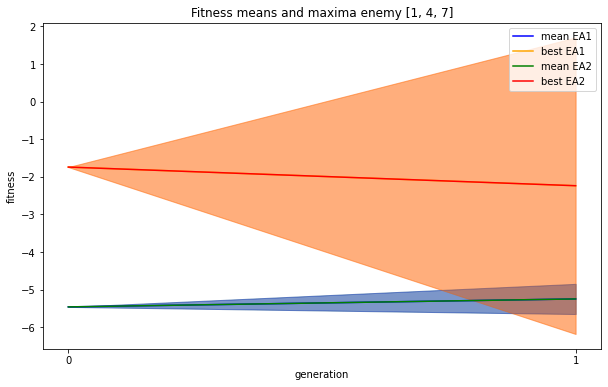

In [58]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(mean_of_means1, label='mean EA1', color="blue")
ax.plot(mean_of_bests1, label='best EA1', color="orange")

'''Uitcommenten voor plot van beide in één'''
ax.plot(mean_of_means2, label='mean EA2', color="green")
ax.plot(mean_of_bests2, label='best EA2', color="red")
plt.fill_between(gen_nums, lb_mean2, ub_mean2, alpha=.3, color="green")
plt.fill_between(gen_nums, lb_best2, ub_best2, alpha=.3, color="red")

plt.fill_between(gen_nums, lb_mean1, ub_mean1, alpha=.3, color="blue")
plt.fill_between(gen_nums, lb_best1, ub_best1, alpha=.3, color="orange")
plt.xticks(gen_nums)
ax.set_xlabel("generation")
ax.set_ylabel("fitness")
ax.set_title("Fitness means and maxima enemy {}".format(enemy_num))
ax.legend()
fig.savefig("lineplot_both_enemy{}.jpg".format(enemy_num),dpi=300, bbox_inches='tight')
# plt.show()

In [44]:
# fig1, ax1 = plt.subplots(figsize=(10,6))
# ax1.plot(mean_of_means2, label='mean EA2', color="green")
# ax1.plot(mean_of_bests2, label='best EA2', color="red")

# plt.fill_between(gen_nums, lb_mean2, ub_mean2, alpha=.3, color="green")
# plt.fill_between(gen_nums, lb_best2, ub_best2, alpha=.3, color="red")
# plt.xticks(gen_nums)
# ax1.set_xlabel("generation")
# ax1.set_ylabel("fitness")
# ax1.set_title("Fitness means and maxima EA2")
# ax1.legend()
# fig1.savefig("lineplot_EA2.jpg",dpi=300, bbox_inches='tight')
# # plt.show()

In [64]:
box_dfs1 = []
box_dfs2 = []
for i in range(1, num_runs):
    for j in EA:
        if j == 'tournament': # juiste ea namen
            box_dfs1.append(pd.read_csv("task2_tournament/boxplot_{}{}{}.txt".format(enemy_num, i, j), sep="\n", header=None))
        elif j == 'crowding':
            box_dfs2.append(pd.read_csv("task2_crowding/boxplot_{}_{}_{}.txt".format(enemy_num, i, j), sep="\n", header=None))

data1 = pd.concat(box_dfs1, axis = 1)
#data2 = pd.concat(box_dfs2, axis = 1)

In [65]:
means1 = data1.mean()
means2 = data2.mean()
means = pd.concat([means1, means2], axis=1)
means.to_csv('means_enemy{}.csv'.format(enemy_num))

In [66]:
#statistical tests
test = stats.ttest_ind(means1, means2)
pval = test[1]
print(pval)

nan


/Users/rensp/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rensp/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


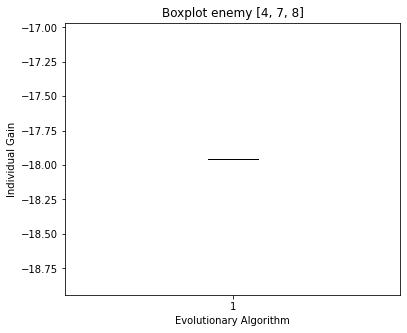

In [67]:
fig2, ax2 = plt.subplots(figsize=(6,5))
c='red'
c1='black'
ax2.boxplot(means, patch_artist=True,
            boxprops=dict(facecolor=c, color=c1),
            capprops=dict(color=c1),
            whiskerprops=dict(color=c1),
            flierprops=dict(color=c, markeredgecolor=c1),
            medianprops=dict(color=c1))
ax2.set_xlabel("Evolutionary Algorithm")
ax2.set_ylabel("Individual Gain")
ax2.set_title("Boxplot enemy {}".format(enemy_num))
ax2 = fig2.gca()
fig2.savefig("boxplot_enemy_{}.jpg".format(enemy_num),dpi=300, bbox_inches='tight')
# plt.show()